In [14]:
import numpy as np
import pandas as pd
import os
from weather_predictor import WeatherPredictor
import matplotlib 
% matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
path = 'PV_data'

## Load data

In [3]:
# load data
all_data = pd.read_csv(os.path.join(path, 'data_out_hourly.csv'))
all_data['date'] = pd.to_datetime(all_data.date)
all_data.set_index('date', inplace = True)

In [4]:
train_end = pd.to_datetime('20170731')
predict_start = pd.to_datetime('20170818-00')
predict_end = pd.to_datetime('20170820-23')

In [17]:
all_data

,hour,DHI,GHI,precipitation,sunshine_dur,temp,apparent_zenith,azimuth,DNI,irradiance,power_output,PV_noise,power_output_noisy
date,,,,,,,,,,,,,
2016-01-01,0,1.000000,2.000000,0.0,0.0,3.916667,152.951337,29.192474,0.000000,1.041040,5.465458,0.406382,5.059076
2016-01-01,1,1.000000,2.000000,0.3,0.0,3.966667,146.269650,53.361376,0.000000,1.072969,5.633085,0.561472,5.071613
2016-01-01,2,1.000000,2.000000,0.0,0.0,3.850000,137.350008,70.597616,0.000000,1.100424,5.777224,0.332850,5.444374
2016-01-01,3,1.000000,2.000000,0.0,0.0,3.683333,127.499366,83.793372,0.000000,1.091607,5.730938,0.423924,5.307014
2016-01-01,4,1.166667,2.500000,0.0,0.0,3.533333,117.394984,94.980482,0.000000,1.216163,6.384854,0.445140,5.939714
2016-01-01,5,1.166667,2.333333,0.0,0.0,2.983333,107.445302,105.348875,0.000000,1.151621,6.046013,0.339696,5.706316
2016-01-01,6,1.166667,2.666667,0.0,0.0,1.683333,97.974301,115.649507,0.000000,1.156989,6.074191,0.791771,5.282420
2016-01-01,7,6.166667,7.666667,0.0,0.0,1.633333,89.103850,126.415593,47.088414,20.676908,108.553765,5.108833,103.444932
2016-01-01,8,32.333333,33.500000,0.0,0.0,1.600000,81.703985,138.040121,8.781663,35.415947,185.933720,17.448305,168.485415


## Select the data to train and to estimate

In [5]:
train_data = all_data[:train_end]
new_data = all_data[predict_start:predict_end]

In [6]:
target_columns  = 'power_output_noisy'
feature_columns = ['sunshine_dur', 'precipitation', 'GHI', 'temp', 'apparent_zenith', 'azimuth']

## Declare and fit the weather predictor

In [7]:
mypred = WeatherPredictor(n_estimators = 1000, 
                                     max_features = 0.5)

In [8]:
mypred.fit_model(train_data, feature_columns, target_columns)

/Applications/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


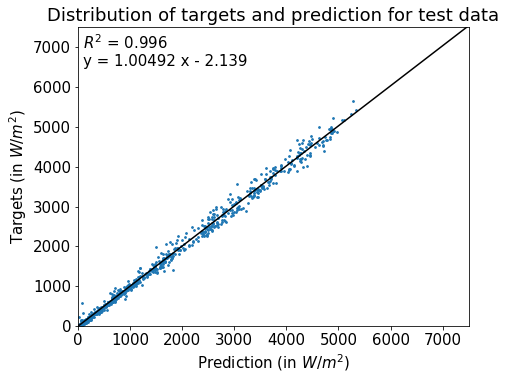

0.003536670107869105

In [9]:
mypred.evaluate_estimator()

## Use LIVE: predict weather variables

In [11]:
new_data

,hour,DHI,GHI,precipitation,sunshine_dur,temp,apparent_zenith,azimuth,DNI,irradiance,power_output,PV_noise,power_output_noisy
date,,,,,,,,,,,,,
2017-08-18,0,0.166667,1.166667,0.0,0.0,18.283333,118.069199,15.254582,0.000000,0.233641,1.226616,0.024049,1.202567
2017-08-18,1,0.333333,1.333333,0.0,0.0,18.383333,114.113229,30.913943,0.000000,0.429978,2.257383,0.288803,1.968579
2017-08-18,2,0.666667,1.833333,0.0,0.0,17.283333,107.895939,45.088377,0.000000,0.820809,4.309249,0.225600,4.083649
2017-08-18,3,0.666667,1.833333,0.0,0.0,16.766667,99.999217,57.773612,0.000000,0.753664,3.956735,0.498983,3.457752
2017-08-18,4,7.166667,8.333333,0.0,0.0,16.783333,90.779528,69.325333,41.469993,6.880628,36.123297,2.174706,33.948591
2017-08-18,5,57.500000,83.666667,0.0,12.0,17.616667,81.100254,80.263927,139.986361,69.457856,364.653746,28.812110,335.841636
2017-08-18,6,122.166667,240.333333,0.0,46.0,20.333333,71.089357,91.202886,374.495816,229.432460,1204.520414,118.272739,1086.247675
2017-08-18,7,116.333333,428.833333,0.0,58.0,22.950000,61.087195,102.885750,642.326400,469.210125,2463.353159,297.654923,2165.698235
2017-08-18,8,93.333333,567.500000,0.0,60.0,24.816667,51.585463,116.292715,759.050242,661.076498,3470.651615,242.621087,3228.030528


In [12]:
pred = mypred.predict(new_data, feature_columns)
timestamps = pd.date_range(predict_start, predict_end, freq = 'H')

In [18]:
series=pd.Series(data=pred, index=timestamps)

## save predictions and real production to csv

In [19]:
series.to_csv(os.path.join(path, 'PV_prediction.csv'))

In [32]:
raw_data = pd.read_csv(os.path.join(path, 'data_out.csv'))
raw_data['time'] = pd.to_datetime(raw_data.time)
raw_data.set_index('time', inplace = True)

ten_min_data = raw_data[predict_start:predict_end].power_output_noisy
ten_min_data.to_csv(os.path.join(path, 'PV_output.csv'))

In [50]:
new_data.power_output_noisy.to_csv(os.path.join(path, 'PV_data_hourly.csv'))

## Plot results

<IPython.core.display.Javascript object>


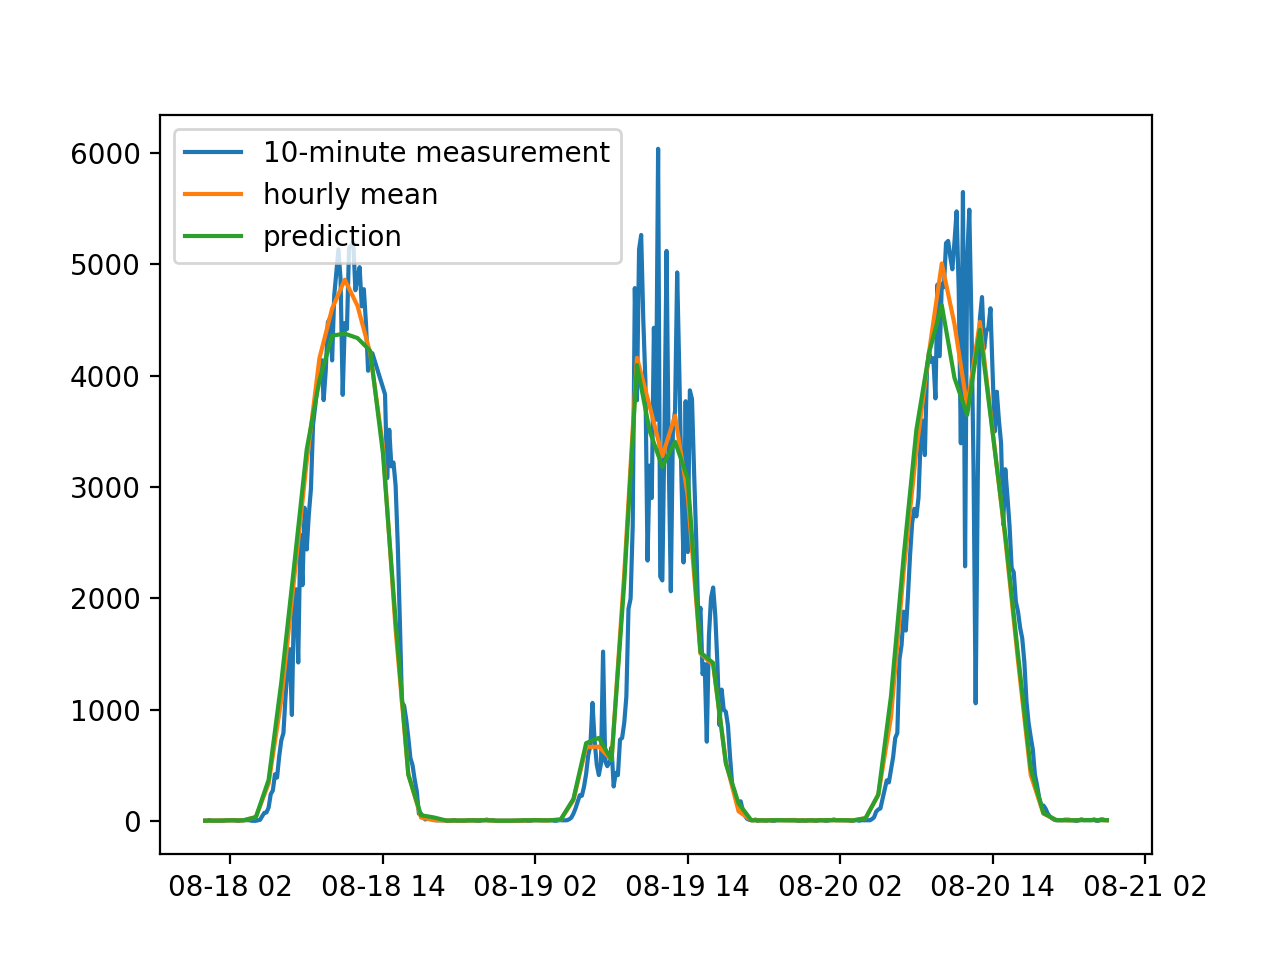

In [49]:
plt.figure()
plt.plot(ten_min_data, label = '10-minute measurement')
plt.plot(timestamps, new_data.power_output_noisy.values, label = 'hourly mean')
plt.plot(timestamps, pred, label = 'prediction')
plt.legend()
plt.show()

## Further ML: Learn consumption patterns